# Определение цифр на изображение

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

digits = load_digits()
pd.DataFrame(digits.data)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


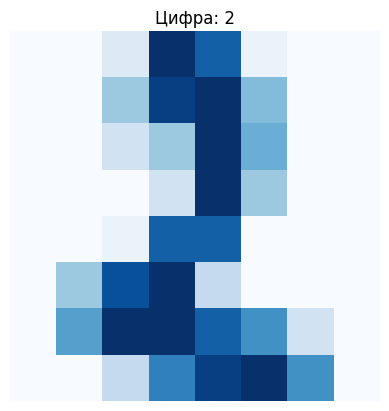

In [2]:
def show_digit(df, index):
    image = df.images[index]
    label = df.target[index]

    plt.imshow(image, cmap="Blues")
    plt.title(f"Цифра: {label}")
    plt.axis("off")
    plt.show()

show_digit(digits, 113)

In [3]:
from sklearn.model_selection import train_test_split

x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Соотношение тренировочных данных к тестовым: ", len(x_train) / len(x_test))

Соотношение тренировочных данных к тестовым:  3.9916666666666667


In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
model

LogisticRegression(max_iter=10000)

In [5]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test) # предсказание модели на тестовую выборку
accuracy = accuracy_score(y_test, y_pred) # оценка точности модели
accuracy

0.975

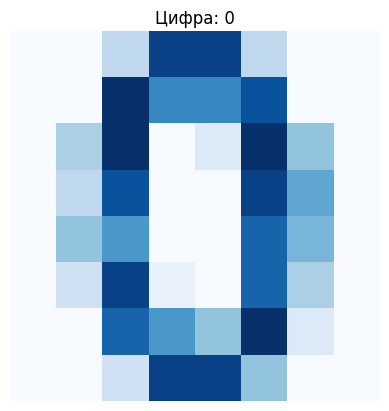

Ответ нейросети:  0


In [19]:
from random import randint 

i = randint(1, 1500)
predict = model.predict(x[i].reshape(1, -1))[0]
correct = y[i]

show_digit(digits, i)
print("Ответ нейросети: ",predict)